# Data preperation (60/40 split from AltumAge paper)

In [2]:
import pandas as pd
import numpy as np
import gc
import pyaging as pya
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import random
from IPython.display import clear_output
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.linear_model import LinearRegression
from age_utils import transform_age, anti_transform_age
from metrics import evaluate_age_prediction

In [3]:
geo_data_27k = [
    'GSE27317',
    'GSE41037',
    'GSE38873',
    'GSE15745',
    'GSE32393',
    'GSE25892',
    'GSE20242',
    'GSE22595',
    'GSE37988',
    'GSE17448',
    'GSE36642',
    'GSE26126',
    'GSE34035',
    'GSE28746',
    'GSE20236',
    'GSE19711',
    'GSE37008',
    'GSE36812',
    'GSE34257',
    'GSE38608',
    'GSE38291',
    'GSE36166',
    'GSE63384',
    'GSE59274',
    'GSE57285',
    'GSE56606',
    'GSE49908',
    'GSE49907',
    'GSE49905',
    'GSE49904'
]

geo_data_450k = [
    'GSE90124',
    'GSE115797',
    'GSE99624',
    'GSE108213',
    'GSE92767',
    'GSE69176',
    'GSE40360',
    'GSE59157',
    'GSE42861',
    'GSE77241',
    'GSE148000'
]

array_express_27k = [
    'E-GEOD-43256',
    'E-GEOD-64940',
    'E-MTAB-2344',
    'E-GEOD-62867',
    'E-GEOD-44763',
    'E-GEOD-48988',
    'E-GEOD-58119',
    'E-GEOD-58045',
    'E-GEOD-57484',
    'E-GEOD-54211',
    'E-GEOD-56342',
    'E-GEOD-27044',
    'E-GEOD-36194',
    'E-GEOD-21232',
    'E-GEOD-32867',
    'E-GEOD-30759',
    'E-GEOD-30758',
    'E-GEOD-32396',
    'E-GEOD-31979',
    'E-MTAB-625',
    'E-MTAB-487'
]

array_express_450k = [
    'E-MTAB-2372',
    'E-GEOD-73832',
    'E-GEOD-71678',
    'E-GEOD-71245',
    'E-GEOD-83334',
    'E-GEOD-75248',
    'E-GEOD-77955',
    'E-GEOD-67705',
    'E-GEOD-77445',
    'E-GEOD-79056',
    'E-GEOD-72556',
    'E-GEOD-52068',
    'E-GEOD-74738',
    'E-GEOD-76105',
    'E-GEOD-65638',
    'E-GEOD-71955',
    'E-GEOD-63106',
    'E-GEOD-73377',
    'E-GEOD-56515',
    'E-GEOD-73103',
    'E-GEOD-67024',
    'E-GEOD-72338',
    'E-GEOD-59457',
    'E-GEOD-64511',
    'E-GEOD-64495',
    'E-GEOD-59509',
    'E-GEOD-67444',
    'E-GEOD-62219',
    'E-GEOD-51954',
    'E-GEOD-52588',
    'E-GEOD-36054',
    'E-GEOD-50660',
    'E-GEOD-61259',
    'E-GEOD-61258',
    'E-GEOD-61257',
    'E-GEOD-61454',
    'E-GEOD-61380',
    'E-GEOD-61107',
    'E-GEOD-54690',
    'E-GEOD-49149',
    'E-GEOD-55438',
    'E-GEOD-53740',
    'E-GEOD-57767',
    'E-GEOD-49064',
    'E-GEOD-50759',
    'E-GEOD-56553',
    'E-GEOD-54399',
    'E-GEOD-53162',
    'E-GEOD-53128',
    'E-GEOD-50498',
    'E-GEOD-47513',
    'E-GEOD-49393',
    'E-GEOD-39004',
    'E-GEOD-51388',
    'E-GEOD-51032',
    'E-GEOD-48325',
    'E-GEOD-44712',
    'E-GEOD-45461',
    'E-GEOD-40279',
    'E-GEOD-41169',
    'E-GEOD-32149',
    'E-GEOD-41826',
    'E-GEOD-42700',
    'E-GEOD-32146',
    'E-GEOD-30870',
    'E-GEOD-34639',
    'E-GEOD-63347',
    'E-GEOD-59592'
]

tcga_all = [
    'TGCA_LUSC',
    'TGCA_THCA',
    'TGCA_HNSC',
    'TGCA_KIRC',
    'TGCA_KIRP',
    'TGCA_LUAD',
    'TGCA_PRAD',
    'TGCA_STAD',
    'TGCA_COAD',
    'TGCA_LIHC',
    'TGCA_UCEC',
    'TGCA_BRCA'
]

cancer_data = [
    'GSE32393',
    'GSE37988',
    'GSE26126',
    'GSE63384',
    'GSE59157',
    'E-GEOD-32867',
    'E-GEOD-30759',
    'E-GEOD-31979',
    'E-GEOD-77955',
    'E-GEOD-52068',
    'E-GEOD-49149',
    'E-GEOD-39004'
]

cancer_comparison = [
    'GSE53051',
]

reliability = [
    'GSE55763',
]

rejuvenation = [
    'GSE142439',
    'GSE116754',
    'GSE65214',
    'GSE44430',
    'GSE45727',
    'GSE30653',
    'GSE37066',
    'GSE30456',
]

senescence_analysis = [
    'GSE91069',
    'GSE100249'
]

data_27k = np.concatenate([np.array(geo_data_27k), np.array(array_express_27k)])
data_450k = np.concatenate([np.array(geo_data_450k), np.array(array_express_450k)])
geo_data = np.concatenate([data_27k, data_450k])
tcga_all = np.array(tcga_all)
all_data = np.concatenate([data_27k, data_450k, tcga_all])

In [4]:
#load all train data for model training
count = 0
for dataset in all_data:
    print(dataset)
    if count == 0:
        all_train = pd.read_pickle('./data_train/' + dataset + '.pkl')
        count += 1
    else:
        new_df = pd.read_pickle('./data_train/' + dataset + '.pkl')
        all_train = pd.concat([all_train, new_df], join ='inner')
        gc.collect()
    clear_output()

#load all test data
count = 0
for dataset in all_data:
    print(dataset)
    if count == 0:
        all_test = pd.read_pickle('./data_test/' + dataset + '.pkl')
        count += 1
    else:
        new_df = pd.read_pickle('./data_test/' + dataset + '.pkl')
        all_test = pd.concat([all_test, new_df], join ='inner')
        gc.collect()
    clear_output()

## Prepare multiplatform CpG data

In [5]:
multi_platform_cpgs = np.array(pd.read_pickle('example_dependencies/multi_platform_cpgs.pkl'))

#extracting age and removing unimportant columns
train_ages = all_train['age'].astype('float64')
test_ages = all_test['age'].astype('float64')

train_info = all_train[['dataset', 'tissue_type', 'age', 'gender']]
test_info = all_test[['dataset', 'tissue_type', 'age', 'gender']]

train = all_train[multi_platform_cpgs]
test = all_test[multi_platform_cpgs]

In [6]:
train_cols = train.columns
train_index = train.index

test_cols = test.columns
test_index = test.index

In [7]:
#scaling the data so each columns has 0 mean and variance 1
scaler = preprocessing.RobustScaler()

train_scaled = pd.DataFrame(scaler.fit_transform(train), index = train_index, columns = train_cols)
test_scaled = pd.DataFrame(scaler.transform(test), index = test_index, columns = test_cols)

## Prepare horvath's CpG data

In [8]:
# Load the CSV file
coeff_df = pd.read_csv("example_dependencies/horvath_cpg.csv", skiprows=2)  # skip rows for metadata above the header

# Get the list of CpG IDs (excluding the intercept row)
horvath_cpg_list = coeff_df['CpGmarker'].dropna().tolist()
horvath_cpg_list = [cpg for cpg in horvath_cpg_list if cpg != '(Intercept)']

In [9]:
train_horvath = all_train[horvath_cpg_list]
test_horvath = all_test[horvath_cpg_list]

train_cols_horvath = train_horvath.columns
train_index_horvath = train_horvath.index

test_cols_horvath = test_horvath.columns
test_index_horvath = test_horvath.index

In [10]:
scaler_horvath = preprocessing.RobustScaler()

train_horvath_scaled = pd.DataFrame(scaler_horvath.fit_transform(train_horvath), index = train_index_horvath, columns = train_cols_horvath)
test_horvath_scaled = pd.DataFrame(scaler_horvath.transform(test_horvath), index = test_index_horvath, columns = test_cols_horvath)

# Models

## Linear Regression
### Linear Regression with Horvath's CpG's

In [11]:

# Initialize and train the model
linear_regression_horvath = LinearRegression()
linear_regression_horvath.fit(train_horvath, transform_age(train_ages))


LinearRegression()

In [12]:
# Predict
predicted_ages_horvath = anti_transform_age(linear_regression_horvath.predict(test_horvath))

# Performance
results_linear = evaluate_age_prediction(test_ages, predicted_ages_horvath, model_name="linear regression (Horvath's CpG's)", cpg_count=len(train_cols_horvath))
print(results_linear.round(3))


                                 Model  CpGs    MAD    MAE     MSE  Pearson R  \
0  linear regression (Horvath's CpG's)   353  3.011  4.492  46.867      0.968   

   Median Error  
0         0.003  


In [13]:
# # Feature importances (coefficients)
# coeffs = pd.Series(model.coef_, index=X_train.columns)
# print(coeffs.sort_values(ascending=False).head(10))


### Linear Regression with all CpG's

In [14]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(train, transform_age(train_ages))

LinearRegression()

In [15]:
predicted_ages = anti_transform_age(linear_regression_model.predict(test))

# Performance
results_linear = evaluate_age_prediction(test_ages, predicted_ages, cpg_count=len(train_cols), model_name="Linear Regression")
print(results_linear.round(3))

               Model   CpGs    MAD   MAE     MSE  Pearson R  Median Error
0  Linear Regression  20318  3.455  5.16  61.511      0.959         0.019


## Ridge Regression
### Ridge with Horvath's CpG's

In [16]:
ridge_horvath = Ridge(alpha=1.0)
ridge_horvath.fit(train_horvath, transform_age(train_ages))

Ridge()

In [17]:
ridge_predictions_horvath = anti_transform_age(ridge_horvath.predict(test_horvath))

results_ridge_horvath = evaluate_age_prediction(test_ages, ridge_predictions_horvath, model_name="Ridge Regression", cpg_count=len(train_cols_horvath))
print(results_ridge_horvath.round(3))

              Model  CpGs    MAD   MAE     MSE  Pearson R  Median Error
0  Ridge Regression   353  2.986  4.45  46.332      0.968        -0.007


In [18]:
ridge_horvath_scaled = Ridge(alpha=1.0)
ridge_horvath_scaled.fit(train_horvath_scaled, transform_age(train_ages))

Ridge()

In [19]:
ridge_predictions_horvath_scales = anti_transform_age(ridge_horvath_scaled.predict(test_horvath_scaled))

results_ridge_horvath_scaled = evaluate_age_prediction(test_ages, ridge_predictions_horvath_scales, model_name="Ridge Regression", cpg_count=len(ridge_horvath_scaled.coef_ !=0))
print(results_ridge_horvath_scaled.round(3))

              Model  CpGs    MAD    MAE     MSE  Pearson R  Median Error
0  Ridge Regression   353  3.008  4.492  46.861      0.968         0.003


### Ridge with all CpG's

In [20]:
ridge = Ridge(alpha=1.0)
ridge.fit(train, transform_age(train_ages))

Ridge()

In [21]:
ridge_predictions = anti_transform_age(ridge.predict(test))

results_ridge = evaluate_age_prediction(test_ages, ridge_predictions, model_name="Ridge Regression", cpg_count=len(train_cols))
print(results_ridge.round(3))

              Model   CpGs    MAD    MAE   MSE  Pearson R  Median Error
0  Ridge Regression  20318  2.852  4.279  43.3      0.971        -0.001


In [22]:
ridge_scaled = Ridge(alpha=1.0)
ridge_scaled.fit(train_scaled, transform_age(train_ages))

Ridge()

In [23]:
ridge_predictions_scaled = anti_transform_age(ridge_scaled.predict(test_scaled))

results_ridge_scaled = evaluate_age_prediction(test_ages, ridge_predictions_scaled, model_name="Ridge Regression", cpg_count=len(train_cols))
print(results_ridge_scaled.round(3))

              Model   CpGs    MAD    MAE     MSE  Pearson R  Median Error
0  Ridge Regression  20318  3.328  5.063  60.069      0.959         0.033


### RidgeCV

In [24]:
ridgeCV = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100])
ridgeCV.fit(train, transform_age(train_ages))
print("Best alpha:", ridgeCV.alpha_)

Best alpha: 10.0


In [25]:
ridgeCV_predictions = anti_transform_age(ridgeCV.predict(test))

results_ridge_CV = evaluate_age_prediction(test_ages, ridgeCV_predictions, model_name="RidgeCV", cpg_count=len(train_cols))
print(results_ridge_CV.round(3))

     Model   CpGs    MAD    MAE     MSE  Pearson R  Median Error
0  RidgeCV  20318  2.412  3.687  33.234      0.977         0.009


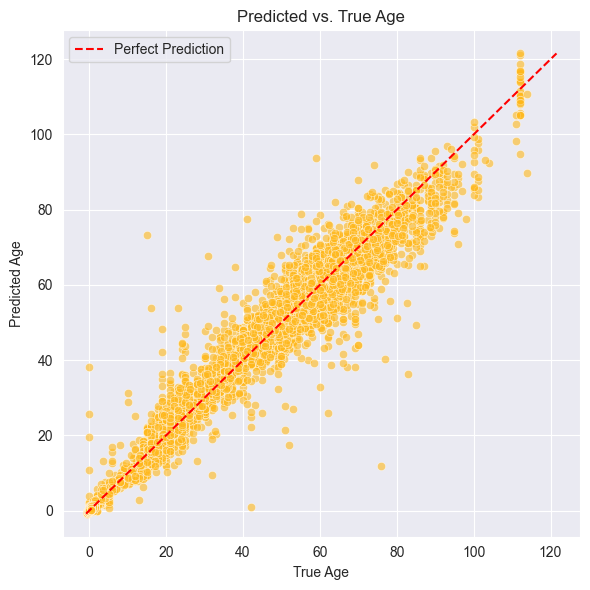

In [26]:
import importlib
import visualization  # your module
importlib.reload(visualization)
from visualization import plot_predicted_vs_true

plot_predicted_vs_true(test_ages, ridgeCV_predictions, (255/255, 184/255, 28/255))

In [27]:
ridgeCV_scaled = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100])
ridgeCV_scaled.fit(train_scaled, transform_age(train_ages))
print("Best alpha:", ridgeCV.alpha_)

Best alpha: 10.0


In [28]:
ridgeCV_predictions_scaled = anti_transform_age(ridgeCV_scaled.predict(test_scaled))

results_ridge_CV_scaled = evaluate_age_prediction(test_ages, ridgeCV_predictions_scaled, model_name="RidgeCV scaled", cpg_count=len(train_cols))
print(results_ridge_CV_scaled.round(3))

            Model   CpGs    MAD    MAE     MSE  Pearson R  Median Error
0  RidgeCV scaled  20318  3.085  4.657  51.165      0.965         0.033


In [29]:
ridge_cv = RidgeCV(alphas=[9.09, 9 ,9.999, 10, 10.001, 10.01, 10.1])
ridge_cv.fit(train, transform_age(train_ages))
print("Best alpha:", ridgeCV.alpha_)

Best alpha: 10.0


#### RidgeCV, horvath's CpG

In [30]:
ridgeCV_horvath = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100])
ridgeCV_horvath.fit(train_horvath, transform_age(train_ages))
print("Best alpha:", ridgeCV.alpha_)

Best alpha: 10.0


In [31]:
pred_horvath = anti_transform_age(ridgeCV_horvath.predict(test_horvath))

results_horvath = evaluate_age_prediction(test_ages, pred_horvath, model_name="RidgeCV scaled", cpg_count=len(train_cols))
print(results_horvath.round(3))

            Model   CpGs    MAD   MAE     MSE  Pearson R  Median Error
0  RidgeCV scaled  20318  2.986  4.45  46.332      0.968        -0.007


In [32]:
ridgeCV_horvath_scaled = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100])
ridgeCV_horvath_scaled.fit(train_horvath_scaled, transform_age(train_ages))
print("Best alpha:", ridgeCV.alpha_)

Best alpha: 10.0


In [33]:
pred_horvath_scaled = anti_transform_age(ridgeCV_horvath_scaled.predict(test_horvath_scaled))

results_horvath_scaled = evaluate_age_prediction(test_ages, pred_horvath_scaled, model_name="RidgeCV scaled", cpg_count=len(train_cols))
print(results_horvath_scaled.round(3))

            Model   CpGs    MAD    MAE     MSE  Pearson R  Median Error
0  RidgeCV scaled  20318  2.995  4.471  46.584      0.968        -0.002


## Lasso Regression
### Lasso with Horvath's CpG's

In [34]:
lasso_horvath = Lasso(alpha=0.001)
lasso_horvath.fit(train_horvath, transform_age(train_ages))

Lasso(alpha=0.001)

In [35]:
lasso_predictions_horvath = anti_transform_age(lasso_horvath.predict(test_horvath))

results_lasso_horvath = evaluate_age_prediction(test_ages, lasso_predictions_horvath, model_name="Lasso Regression (Horvath's CpG's)", cpg_count=np.sum(lasso_horvath.coef_ != 0))
print(results_lasso_horvath.round(3))

                                Model  CpGs    MAD    MAE    MSE  Pearson R  \
0  Lasso Regression (Horvath's CpG's)   121  3.138  4.892  56.07      0.962   

   Median Error  
0        -0.006  


In [36]:
lasso_horvath_scaled = Lasso(alpha=0.001)
lasso_horvath_scaled.fit(train_horvath_scaled, transform_age(train_ages))

C:\Users\elena\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.105e+02, tolerance: 2.983e+00
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.001)

In [37]:
lasso_predictions_horvath_scaled = anti_transform_age(lasso_horvath_scaled.predict(test_horvath_scaled))

results_lasso_horvath = evaluate_age_prediction(test_ages, lasso_predictions_horvath_scaled, model_name="Lasso Regression (Horvath's CpG's)", cpg_count=np.sum(lasso_horvath_scaled.coef_ != 0))
print(results_lasso_horvath.round(3))

                                Model  CpGs    MAD    MAE     MSE  Pearson R  \
0  Lasso Regression (Horvath's CpG's)   307  3.019  4.452  46.184      0.969   

   Median Error  
0         0.004  


### Lasso with all CpG's

In [38]:
lasso = Lasso(alpha=0.001)
lasso.fit(train, transform_age(train_ages))

C:\Users\elena\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.337e+02, tolerance: 2.983e+00
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.001)

In [39]:
lasso_predictions = anti_transform_age(lasso.predict(test))

results_lasso = evaluate_age_prediction(test_ages, lasso_predictions, model_name="Lasso", cpg_count=np.sum(lasso.coef_ != 0))
print(results_lasso.round(3))

   Model  CpGs    MAD   MAE     MSE  Pearson R  Median Error
0  Lasso   353  2.899  4.52  47.768      0.968        -0.011


In [40]:
lasso_scaled = Lasso(alpha=0.001)
lasso_scaled.fit(train_scaled, transform_age(train_ages))

C:\Users\elena\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.996e+02, tolerance: 2.983e+00
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.001)

In [41]:
lasso_predictions_scaled = anti_transform_age(lasso_scaled.predict(test_scaled))

results_lasso_scaled = evaluate_age_prediction(test_ages, lasso_predictions_scaled, model_name="Lasso", cpg_count=np.sum(lasso_scaled.coef_ != 0))
print(results_lasso_scaled.round(3))

   Model  CpGs    MAD    MAE     MSE  Pearson R  Median Error
0  Lasso  3967  2.753  4.169  42.767      0.971         0.027


### LassoCV

In [42]:
lasso_cv = LassoCV(alphas=[0.0001, 0.001, 0.002], cv=5, max_iter=1000)
lasso_cv.fit(train, transform_age(train_ages))
print("Best alpha:", lasso_cv.alpha_)

C:\Users\elena\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.185e+00, tolerance: 2.440e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\elena\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.011e+01, tolerance: 2.440e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\elena\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

Best alpha: 0.001


C:\Users\elena\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.337e+02, tolerance: 2.983e+00
  model = cd_fast.enet_coordinate_descent(


In [43]:
lassoCV_pred = anti_transform_age(lasso_cv.predict(test))

results_lassoCV = evaluate_age_prediction(test_ages, lassoCV_pred, model_name="LassoCV", cpg_count=np.sum(lasso_cv.coef_ != 0))
print(results_lassoCV.round(3))

     Model  CpGs    MAD   MAE     MSE  Pearson R  Median Error
0  LassoCV   353  2.899  4.52  47.768      0.968        -0.011


In [44]:
lasso_cv_scaled = LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10], cv=5)
lasso_cv_scaled.fit(train_scaled, transform_age(train_ages))

C:\Users\elena\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.593e+01, tolerance: 2.440e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\elena\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.154e+01, tolerance: 2.440e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\elena\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10], cv=5)

In [45]:
lassoCV_predictions_scaled = anti_transform_age(lasso_cv_scaled.predict(test_scaled))

results_lassoCV_scaled = evaluate_age_prediction(test_ages, lassoCV_predictions_scaled, model_name="LassoCV", cpg_count=np.sum(lasso_cv_scaled.coef_ != 0))
print(results_lassoCV_scaled.round(3))

     Model  CpGs    MAD    MAE     MSE  Pearson R  Median Error
0  LassoCV  3967  2.753  4.169  42.767      0.971         0.027


## ElasticNet

### ElasticNet horvath

In [46]:
elasticNet_horvath = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticNet_horvath.fit(train_horvath, transform_age(train_ages))

ElasticNet(alpha=0.1)

In [47]:
elasticNet_horvath_pred = anti_transform_age(elasticNet_horvath.predict(test_horvath))

results_elastic_horvath = evaluate_age_prediction(test_ages, elasticNet_horvath_pred, model_name="ElasticNet Horvath", cpg_count=np.sum(elasticNet_horvath.coef_ != 0))
print(results_elastic_horvath.round(3))

                Model  CpGs     MAD    MAE      MSE  Pearson R  Median Error
0  ElasticNet Horvath    32  11.666  13.59  297.211      0.835         3.577


In [48]:
elasticNet_horvath_scaled = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticNet_horvath_scaled.fit(train_horvath_scaled, transform_age(train_ages))

ElasticNet(alpha=0.1)

In [49]:
elasticNet_horvath_pred_scaled = anti_transform_age(elasticNet_horvath_scaled.predict(test_horvath_scaled))

results_elastic_horvath_scaled = evaluate_age_prediction(test_ages, elasticNet_horvath_pred_scaled, model_name="ElasticNet Horvath", cpg_count=np.sum(elasticNet_horvath.coef_ != 0))
print(results_elastic_horvath_scaled.round(3))

                Model  CpGs    MAD    MAE     MSE  Pearson R  Median Error
0  ElasticNet Horvath    32  4.182  6.186  83.509      0.945        -0.019


### ElasticNet all CpG

In [50]:
elasticNet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticNet.fit(train, transform_age(train_ages))

ElasticNet(alpha=0.1)

In [51]:
elasticNet_pred = anti_transform_age(elasticNet.predict(test))

results_elasticNet = evaluate_age_prediction(test_ages, elasticNet_pred, model_name="ElasticNet", cpg_count=np.sum(elasticNet.coef_ != 0))
print(results_elasticNet.round(3))

        Model  CpGs     MAD     MAE      MSE  Pearson R  Median Error
0  ElasticNet    52  10.692  12.632  268.505      0.843         2.114


In [52]:
elasticNet_scaled = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticNet_scaled.fit(train_scaled, transform_age(train_ages))

ElasticNet(alpha=0.1)

In [53]:
elasticNet_pred_scaled = anti_transform_age(elasticNet_scaled.predict(test_scaled))

results_elasticNet_scaled = evaluate_age_prediction(test_ages, elasticNet_pred_scaled, model_name="ElasticNet scaled", cpg_count=np.sum(elasticNet_scaled.coef_ != 0))
print(results_elasticNet_scaled.round(3))

               Model  CpGs   MAD    MAE     MSE  Pearson R  Median Error
0  ElasticNet scaled   130  4.18  6.103  80.076      0.947        -0.028


### ElasticNet CV

In [54]:
elastic_cv = ElasticNetCV(
    alphas=[0.001, 0.01, 0.1],
    l1_ratio=[0.1, 0.5, 0.9],
    cv=5,
    max_iter=1000
)
elastic_cv.fit(train_scaled, transform_age(train_ages))

C:\Users\elena\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.581e+01, tolerance: 2.440e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\elena\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.548e+01, tolerance: 2.440e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\elena\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

ElasticNetCV(alphas=[0.001, 0.01, 0.1], cv=5, l1_ratio=[0.1, 0.5, 0.9])

In [55]:
elasticCV_pred_scaled = anti_transform_age(elastic_cv.predict(test_scaled))

results_elasticCV = evaluate_age_prediction(test_ages, elasticCV_pred_scaled, model_name="ElasticNetCV", cpg_count=np.sum(elastic_cv.coef_ != 0))
print(results_elasticCV.round(3))

print("Best alpha:", elastic_cv.alpha_)
print("Best l1_ratio:", elastic_cv.l1_ratio_)


          Model  CpGs    MAD    MAE     MSE  Pearson R  Median Error
0  ElasticNetCV  4321  2.723  4.092  41.168      0.972         0.018
Best alpha: 0.01
Best l1_ratio: 0.1


In [59]:
# Step 1: Evaluate each model
results = []

results.append(evaluate_age_prediction(test_ages, predicted_ages_horvath, model_name="Linear regression", cpg_count=len(train_cols_horvath)))
results.append(evaluate_age_prediction(test_ages, ridgeCV_predictions, model_name="Ridge regression", cpg_count=len(train_cols)))
results.append(evaluate_age_prediction(test_ages, lasso_predictions_scaled, model_name="Lasso regression", cpg_count=np.sum(lasso_scaled.coef_ != 0)))
results.append(evaluate_age_prediction(test_ages, elasticCV_pred_scaled, model_name="ElasticNetCV", cpg_count=np.sum(elastic_cv.coef_ != 0)))

# Step 2: Combine into one DataFrame
all_results = pd.concat(results, ignore_index=True)

# Step 3: Bold best scores
def bold_best(s, maximize=False):
    if maximize:
        is_best = s == s.max()
    else:
        is_best = s == s.min()
    return ['font-weight: bold' if v else '' for v in is_best]

styled_table = (
    all_results.style
    .apply(bold_best, subset=['MAD'], maximize=False)
    .apply(bold_best, subset=['MAE'], maximize=False)
    .apply(bold_best, subset=['MSE'], maximize=False)
    .apply(bold_best, subset=['Pearson R'], maximize=True)
    .apply(bold_best, subset=['Median Error'], maximize=False)
)

styled_table


,Model,CpGs,MAD,MAE,MSE,Pearson R,Median Error
0,Linear regression,353,3.011199,4.492477,46.866656,0.968033,0.002715
1,Ridge regression,20318,2.411616,3.686716,33.233970,0.977453,0.008723
2,Lasso regression,3967,2.752963,4.168844,42.767181,0.970948,0.027384
3,ElasticNetCV,4321,2.722871,4.092016,41.167685,0.972020,0.017709
